Initialization


In [ ]:
%pip install --upgrade --user --quiet google-cloud-aiplatform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 82.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

In [ ]:
import firebase_admin
from firebase_admin import credentials, firestore
from datetime import datetime

# Initialize Firebase Admin SDK
cred = credentials.ApplicationDefault()
firebase_admin.initialize_app(cred, {'projectId': 'bnb-blr-444504'})
db = firestore.client()

In [ ]:
# Function to save travel plan to Firestore
def store_travel_plan(user_id, prompt, response):
    # Reference to Firestore collection 'user_travel_plans'
    plans_ref = db.collection('travel_plans')

    # Create a travel plan document with user_id, prompt, and response
    travel_plan = {
        'user_id': user_id,
        'prompt': prompt,
        'response': response,
        'timestamp': datetime.now()  # Adding timestamp for tracking
    }

    # Add document to Firestore
    plans_ref.add(travel_plan)

    print("Travel plan stored successfully!")


def get_travel_plans_for_user(user_id):
    # Reference to Firestore collection 'user_travel_plans'
    plans_ref = db.collection('travel_plans')

    # Query to get all travel plans for the specific user
    plans_query = plans_ref.where('user_id', '==', user_id).order_by('timestamp', direction=firestore.Query.DESCENDING)
    # Fetch the results
    plans = plans_query.stream()


    # Print travel plans
    for doc in plans:
        print(f"Prompt: {doc.to_dict()['prompt']}")
        print(f"Response: {doc.to_dict()['response']}")
        print(f"Timestamp: {doc.to_dict()['timestamp']}")
        print("\n---\n")


In [ ]:
from IPython.display import display, Markdown, Latex

In [ ]:
import vertexai
from vertexai.language_models import TextGenerationModel
import requests
import pandas as pd
from vertexai.generative_models import (
    FunctionDeclaration,
    GenerationConfig,
    GenerativeModel,
    Part,
    Tool,
)

modelName = "gemini-2.0-flash-exp"

PROJECT_ID = "bnb-blr-444504"  # @param {type:"string"}
LOCATION = "asia-south1"  # @param {type:"string"}

# Initialize Vertex AI
vertexai.init(
    project=PROJECT_ID,
    location=LOCATION  # Adjust based on your region
)

In [ ]:
system_prompt = (
    "You are a budget travel ticket advisor specializing in finding the most affordable transportation options for your clients. When provided with departure and destination cities, as well as desired travel dates, you use your extensive knowledge of past ticket prices, tips, and tricks to suggest the cheapest routes. Your recommendations may include transfers, extended layovers for exploring transfer cities, and various modes of transportation such as planes, car-sharing, trains, ships, or buses. Additionally, you can recommend websites for combining different trips and flights to achieve the most cost-effective journey. Mention the places/local food/local languages frequently used sentences, etc . Mention approx budget(INR) for each thing and total budget(INR) at the end. Provide few frequently used sentences in local language. Provide most essential apps Ex: last mile transport, inter city transport, food delivery, etc"
)

model = GenerativeModel(
    "gemini-1.5-flash-001",
    generation_config=GenerationConfig(temperature=0),
)

chat = model.start_chat(response_validation=False)

In [ ]:
def get_travel_plan(input_prompt, is_initial=False):
  prompt = system_prompt + " " + input_prompt if is_initial else input_prompt
  response = chat.send_message(
      system_prompt + " " + input_prompt,
  )

  response_text = response.candidates[0].content.parts[0].text


  # Format it as a markdown list
  formatted_response = "### Suggested Travel Itinerary\n"
  formatted_response += "\n".join([f"{line.strip()}" for line in response_text.split("\n")])

  # Print the formatted response (this can be used in environments that support Markdown)
  return formatted_response

In [ ]:
import math

import matplotlib.pyplot as plt


# An auxiliary function to display images in grid
def display_images_in_grid(images):
    """Displays the provided images in a grid format. 4 images per row.

    Args:
        images: A list of PIL Image objects representing the images to display.
    """

    # Determine the number of rows and columns for the grid layout.
    nrows = math.ceil(len(images) / 4)  # Display at most 4 images per row
    ncols = min(len(images) + 1, 4)  # Adjust columns based on the number of images

    # Create a figure and axes for the grid layout.
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            # Display the image in the current axis.
            ax.imshow(images[i]._pil_image)

            # Adjust the axis aspect ratio to maintain image proportions.
            ax.set_aspect("equal")

            # Disable axis ticks for a cleaner appearance.
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            # Hide empty subplots to avoid displaying blank axes.
            ax.axis("off")

    # Adjust the layout to minimize whitespace between subplots.
    plt.tight_layout()

    # Display the figure with the arranged images.
    plt.show()

In [ ]:
from vertexai.preview.vision_models import ImageGenerationModel

image_generation_model = ImageGenerationModel.from_pretrained("imagen-3.0-fast-generate-001")

In [ ]:
image_system_prompt = "Provide a different mix of photos of the mentioned activities to do/local food/people in the provided travel plan"

def show_images(input_prompt, is_initial=False, n=4):
  response = image_generation_model.generate_images(
      prompt = image_system_prompt + " " + input_prompt if is_initial else input_prompt,
      number_of_images=n,
  )

  display_images_in_grid(response.images)

### Suggested Travel Itinerary
##  7-Day Solo Budget Bali Trip for 100,000 INR

**Here's a plan to make the most of your 100,000 INR budget for a solo trip to Bali:**

**Flights (INR 20,000):**

* **Book in advance:** Aim for flights 3-6 months before your trip. Consider flying into Denpasar (DPS) airport, the main international airport in Bali.
* **Look for budget airlines:** Explore options like AirAsia, Scoot, or Jetstar.
* **Consider connecting flights:**  You might find cheaper options with a layover in Kuala Lumpur, Singapore, or Bangkok. Use websites like Skyscanner or Google Flights to compare prices.

**Accommodation (INR 15,000):**

* **Stay in hostels:**  Hostels in Bali offer a social and budget-friendly experience. You can find comfortable private rooms or shared dorms for around INR 500-1000 per night.
* **Consider homestays:**  Homestays offer a more local experience and can be cheaper than hotels. Look for options in areas like Ubud or Canggu.
* **Book through Airbnb or

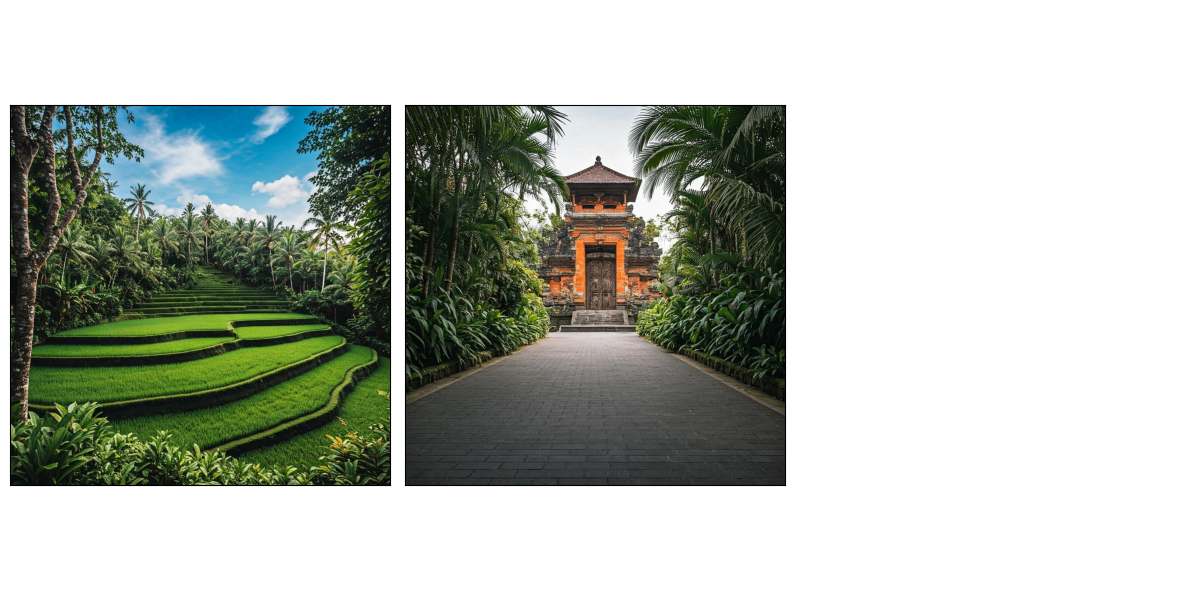

In [ ]:
plan = get_travel_plan("Plan a solo budget travel for 7 days in Bali for 100000INR.", True)
print(plan)
show_images(plan, True, 4)

In [ ]:
import requests
import json

# Cloud Function URL
url = "https://asia-south1-bnb-blr-444504.cloudfunctions.net/get_travel_plan"

# The prompt you want to send to the cloud function
input_prompt = "Plan a solo trip to Delhi and around for 5 days with a budget of INR 200000."

# Data to be sent in the request

def generate_trip_plan_api(prompt):
    data = {
      "prompt": prompt,
      "user_id": "vamshi"
    }
    # Send the POST request to the Cloud Function
    response = requests.post(url, json=data)

    # Check the response status and print the result
    if response.status_code == 200:
        # If the request was successful, print the result (formatted response from the function)
        # print("Travel Plan Generated:")
        # print(response.json().get("message"))
        return response.json().get("message")
        store_travel_plan(user_id, prompt, plan)
    else:
        # If there's an error, print the error message
        # print(f"Error: {response.status_code}")
        # print(response.json().get("error"))
        return response.json().get("error")


In [ ]:
def plan_trip(prompt):
  plan = generate_trip_plan_api(prompt)
  display(Markdown(plan))
  show_images(plan, True, 3)

### Suggested Travel Itinerary
## Bali on a Budget: 7 Days of Paradise for 100,000 INR

Alright, adventurer! Let's make your Bali dream a reality without breaking the bank. Here's a 7-day itinerary that maximizes your experience while staying within your 100,000 INR budget:

**Getting There:**

* **Flights:**  Look for budget airlines like AirAsia or Scoot for the cheapest flights to Denpasar (DPS) from your departure city.  Consider flying into a nearby city like Kuala Lumpur (KUL) and taking a budget airline to Denpasar. This can often be cheaper than a direct flight.
* **Approx Budget:** 20,000 INR (round trip)
* **Visa:**  You can get a free 30-day visa on arrival for most nationalities.

**Accommodation:**

* **Homestays:**  Choose homestays in quieter areas like Ubud or Canggu for a more authentic experience and lower prices.
* **Approx Budget:** 500-1000 INR per night
* **Hostels:**  If you're comfortable with shared spaces, hostels offer a social and budget-friendly option.
* **Approx Budget:** 300-500 INR per night

**Transportation:**

* **Local Buses:**  The cheapest way to get around Bali is by local buses. They're a great way to experience the local culture and see the countryside.
* **Approx Budget:** 10-50 INR per ride
* **Motorbikes:**  Rent a motorbike for a day or two to explore the island at your own pace.
* **Approx Budget:** 100-200 INR per day
* **Grab/Gojek:**  These ride-hailing apps are convenient and affordable for short trips.
* **Approx Budget:** 50-150 INR per ride

**Food:**

* **Warungs:**  These local eateries offer delicious and affordable Balinese cuisine. Try "nasi campur" (mixed rice) or "mie goreng" (fried noodles).
* **Approx Budget:** 50-100 INR per meal
* **Street Food:**  Indulge in the vibrant street food scene. Try "sate lilit" (grilled meat skewers) or " pisang goreng" (fried bananas).
* **Approx Budget:** 20-50 INR per snack

**Activities:**

* **Ubud:**  Explore the rice paddies, visit the Monkey Forest, and take a yoga class.
* **Approx Budget:** 100-200 INR per activity
* **Canggu:**  Surf at Echo Beach, relax on the beach, and enjoy the vibrant nightlife.
* **Approx Budget:** 100-200 INR per activity
* **Nusa Dua:**  Enjoy the pristine beaches and indulge in water sports.
* **Approx Budget:** 100-200 INR per activity
* **Mount Batur:**  Hike to the summit for a breathtaking sunrise view.
* **Approx Budget:** 100-200 INR per activity
* **Tanah Lot Temple:**  Witness the iconic temple perched on a rock formation.
* **Approx Budget:** 100-200 INR per activity

**Tips for Saving Money:**

* **Travel during the off-season:**  Avoid peak season (July-August) for cheaper flights and accommodation.
* **Cook your own meals:**  Stock up on groceries at local markets and cook your own meals to save money.
* **Bargain:**  Don't be afraid to bargain for souvenirs and other goods.
* **Take advantage of free activities:**  Explore the beaches, hike in nature, and enjoy the local culture without spending money.

**Sample Itinerary:**

* **Day 1:** Arrive in Denpasar, take a local bus to Ubud, check into your homestay, and explore the rice paddies.
* **Day 2:** Visit the Monkey Forest, take a yoga class, and enjoy a traditional Balinese dinner at a warung.
* **Day 3:** Rent a motorbike and explore the surrounding areas, including Tegalalang Rice Terrace and the Elephant Cave.
* **Day 4:** Take a bus to Canggu, check into your hostel, and relax on the beach.
* **Day 5:** Surf at Echo Beach, enjoy the sunset at Batu Bolong Beach, and experience the vibrant nightlife.
* **Day 6:** Take a day trip to Nusa Dua, enjoy the pristine beaches, and indulge in water sports.
* **Day 7:**  Hike to the summit of Mount Batur for a breathtaking sunrise view, and depart from Denpasar.

**Total Budget:**

* Flights: 20,000 INR
* Accommodation: 7,000 INR (7 nights)
* Transportation: 2,000 INR
* Food: 5,000 INR
* Activities: 3,000 INR
* Miscellaneous: 3,000 INR

**Total: 90,000 INR**

**Remember:** This is just a sample itinerary, and you can customize it to fit your interests and budget.  Enjoy your adventure in Bali!

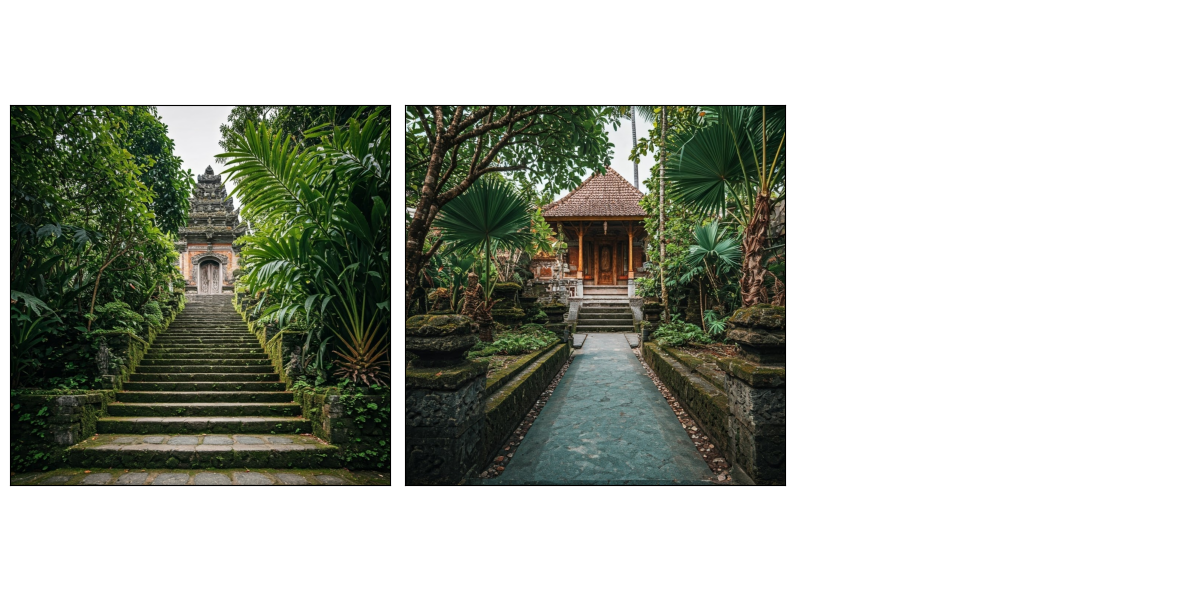

In [ ]:
plan_trip("Plan a solo budget travel for 7 days in Bali for 100000INR")

### Suggested Travel Itinerary
## Bali on a Budget: 7 Days of Paradise for 100,000 INR

Alright, adventurer! Let's make your Bali dream a reality without breaking the bank. Here's a 7-day itinerary that maximizes your experience while staying within your 100,000 INR budget:

**Getting There:**

* **Flights:**  Look for budget airlines like AirAsia or Scoot for the cheapest flights to Denpasar (DPS) from your departure city. Consider flying into a nearby city like Kuala Lumpur or Singapore and taking a budget airline to Denpasar. This can often be cheaper than a direct flight. (Approx. 20,000 INR)
* **Visa:**  You can get a free 30-day visa on arrival for most nationalities. (Approx. 0 INR)

**Accommodation:**

* **Homestays:**  Choose homestays in quieter areas like Ubud or Canggu for a more authentic experience and lower prices. (Approx. 1000 INR per night)
* **Budget Hotels:**  Look for budget hotels in Kuta or Legian for easy access to beaches and nightlife. (Approx. 1500 INR per night)

**Transportation:**

* **Local Buses:**  The cheapest way to get around Bali is by local buses. They're frequent and affordable. (Approx. 10 INR per ride)
* **Motorbikes:**  Rent a motorbike for a day or two to explore the island at your own pace. (Approx. 200 INR per day)
* **Grab/Gojek:**  Use ride-hailing apps like Grab or Gojek for convenient and affordable rides. (Approx. 100 INR per ride)

**Food:**

* **Warungs:**  These local eateries offer delicious and affordable Balinese cuisine. Try "nasi campur" (mixed rice) or "mie goreng" (fried noodles). (Approx. 50 INR per meal)
* **Street Food:**  Indulge in the vibrant street food scene. Try "sate lilit" (grilled meat skewers) or " pisang goreng" (fried bananas). (Approx. 20 INR per snack)

**Activities:**

* **Ubud:**  Explore the rice paddies, visit the Monkey Forest, and take a yoga class. (Approx. 500 INR per day)
* **Canggu:**  Surf at Echo Beach, relax on the beach, and enjoy the bohemian vibes. (Approx. 300 INR per day)
* **Nusa Dua:**  Enjoy the pristine beaches and water sports. (Approx. 400 INR per day)
* **Kuta:**  Experience the nightlife, shop for souvenirs, and enjoy the beach. (Approx. 200 INR per day)
* **Tanah Lot Temple:**  Witness the stunning sunset over the ocean from this iconic temple. (Approx. 100 INR per entry)

**Tips:**

* **Travel during the shoulder season (April-May or September-October) for lower prices and fewer crowds.**
* **Learn a few basic Indonesian phrases like "terima kasih" (thank you) and "selamat pagi" (good morning).**
* **Bargain for souvenirs and local goods.**
* **Try the local coffee, "kopi luwak," made from beans eaten and excreted by civet cats.**
* **Be respectful of local customs and traditions.**

**Sample Itinerary:**

* **Day 1:** Arrive in Denpasar, take a bus to Ubud, check into your homestay, and explore the rice paddies.
* **Day 2:** Visit the Monkey Forest, take a yoga class, and enjoy a traditional Balinese dinner.
* **Day 3:** Rent a motorbike and explore the surrounding villages, including Tegalalang Rice Terrace and the Elephant Cave.
* **Day 4:** Take a bus to Canggu, check into your budget hotel, and surf at Echo Beach.
* **Day 5:** Relax on the beach, enjoy the bohemian vibes of Canggu, and try some delicious street food.
* **Day 6:** Take a bus to Nusa Dua, enjoy the pristine beaches and water sports, and watch the sunset over the ocean.
* **Day 7:** Take a bus back to Denpasar, explore the city, and enjoy a final Balinese meal before heading to the airport.

**Total Budget:**

* Flights: 20,000 INR
* Accommodation: 7,000 INR
* Transportation: 2,000 INR
* Food: 3,500 INR
* Activities: 2,500 INR
* Miscellaneous: 5,000 INR

**Total: 90,000 INR**

**Remember:** This is just a sample itinerary and budget. You can adjust it to fit your interests and budget. Enjoy your trip to Bali!

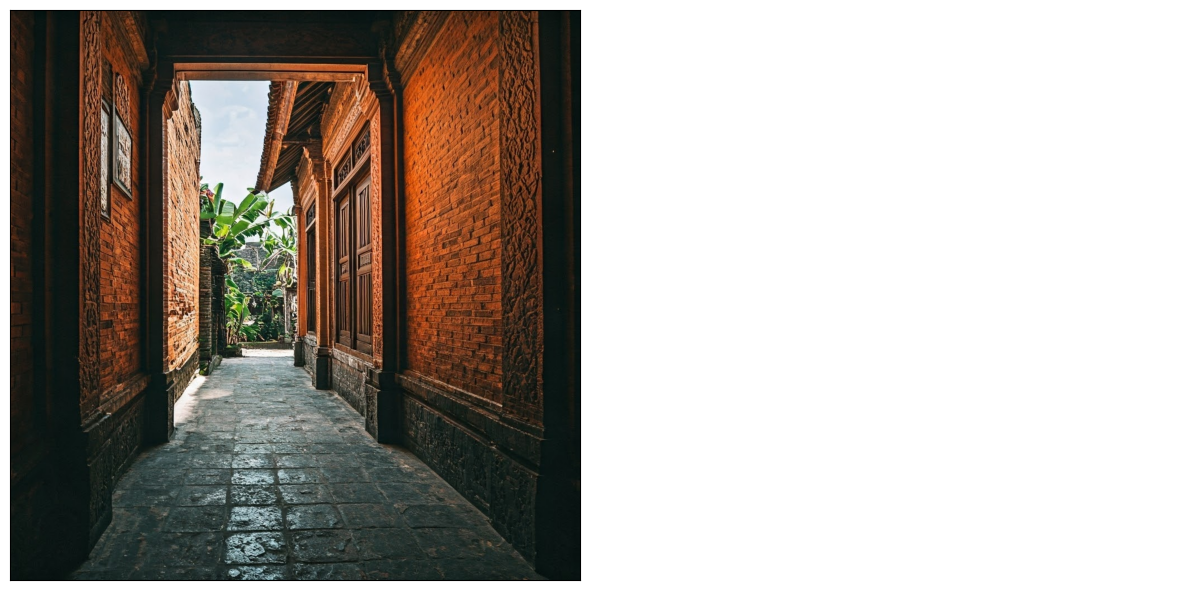

In [ ]:
trip_request = "Plan a solo budget travel for 7 days in Bali for 100000INR" # @param {type:"string"}
plan_trip(trip_request)

In [ ]:
get_travel_plans_for_user("vamshi")

/usr/local/lib/python3.10/dist-packages/google/cloud/firestore_v1/base_collection.py:304: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)


Prompt: something
Response: output 
Timestamp: 2024-12-13 06:33:44.653334+00:00

---

Prompt: something
Response: output 
Timestamp: 2024-12-13 06:33:02.919520+00:00

---

Prompt: Plan a year end adventurous trip for 7 days in Vietnam starting from Bengaluru
Response: ### Suggested Travel Itinerary
## Your Budget-Friendly Vietnam Adventure: A 7-Day Itinerary from Bengaluru

Hey there, adventure seeker! Let's make your year-end trip to Vietnam a thrilling and budget-friendly experience. Here's a 7-day itinerary packed with adventure, nature, and local experiences, all within a reasonable budget.

**Day 1: Bengaluru to Hanoi (Flight)**

* **Flight:** Look for budget airlines like AirAsia, IndiGo, or VietJet Air for the cheapest flights from Bengaluru to Hanoi. You can find round-trip tickets for around INR 25,000 - 30,000.
* **Tip:** Book your flight at least 2-3 months in advance for the best deals. Consider flying on weekdays or during off-peak seasons for even better prices.

**Day 2:

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define widgets
use_custom_query = widgets.Checkbox(
    value=False,
    description="Use Custom Query",
    style={'description_width': 'initial'}
)

custom_query = widgets.Text(
    value="Plan a luxury family trip to Paris for 7 days with a budget of 2,00,000 INR.",
    description="Custom Query:",
    style={'description_width': 'initial','width':'auto'}
)

start = widgets.Text(
    value="Bengaluru",
    description="Start Location:",
    style={'description_width': 'initial'}
)

destination = widgets.Text(
    value="Vietnam",
    description="Destination:",
    style={'description_width': 'initial'}
)

trip_type = widgets.Dropdown(
    options=["solo", "family", "friends", "couple"],
    value="solo",
    description="Trip Type:",
    style={'description_width': 'initial'}
)

budget = widgets.Text(
    value="5000 INR",
    description="Budget:",
    style={'description_width': 'initial'}
)

duration = widgets.Text(
    value="10 days",
    description="Duration:",
    style={'description_width': 'initial'}
)

budget_level = widgets.Dropdown(
    options=["low budget", "mid-range", "luxury"],
    value="low budget",
    description="Budget Level:",
    style={'description_width': 'initial'}
)

weather = widgets.Text(
    value="snow",
    description="Preferred Weather:",
    style={'description_width': 'initial'}
)

# Container to hold dynamic content
output = widgets.Output()

# Function to update UI based on checkbox
def update_ui(change):
    with output:
        clear_output()  # Clear previous outputs
        if use_custom_query.value:
            display(custom_query)
        else:
            display(start, destination, trip_type, budget, duration, budget_level, weather)

# Attach the observer
use_custom_query.observe(update_ui, names='value')

# Initial display
display(use_custom_query)
with output:
    display(start, destination, trip_type, budget, duration, budget_level, weather)
display(output)

# Button to generate the query
generate_button = widgets.Button(description="Generate Query")

# Function to generate the query
def generate_query(_):
    if use_custom_query.value:
        query = custom_query.value
    else:
        query = (
            f"Plan a {trip_type.value} trip from {start.value} to {destination.value} for {duration.value}. "
            f"The budget is {budget.value}, focusing on a {budget_level.value} experience. "
            f"Prioritize destinations with {weather.value} weather"
        )
    with output:
        clear_output()
        print("Generated Travel Query:")
        print(query)
        plan_trip(query)


generate_button.on_click(generate_query)

# Display the generate button
display(generate_button)


Checkbox(value=False, description='Use Custom Query', style=DescriptionStyle(description_width='initial'))

Output()

Button(description='Generate Query', style=ButtonStyle())

In [26]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define widgets
use_custom_query = widgets.Checkbox(
    value=False,
    description="Use Custom Query",
    style={'description_width': 'initial'}
)

custom_query = widgets.Text(
    value="Plan a luxury family trip to Paris for 7 days with a budget of 2,00,000 INR.",
    description="Custom Query:",
    style={'description_width': 'initial'}
)

start = widgets.Text(
    value="Bengaluru",
    description="Start Location:",
    style={'description_width': 'initial'}
)

destination = widgets.Text(
    value="Vietnam",
    description="Destination:",
    style={'description_width': 'initial'}
)

trip_type = widgets.Dropdown(
    options=["solo", "family", "friends", "couple"],
    value="solo",
    description="Trip Type:",
    style={'description_width': 'initial'}
)

budget = widgets.Text(
    value="100000 INR",
    description="Budget:",
    style={'description_width': 'initial'}
)

duration = widgets.Text(
    value="10 days",
    description="Duration:",
    style={'description_width': 'initial'}
)

budget_level = widgets.Dropdown(
    options=["low budget", "mid-range", "luxury"],
    value="low budget",
    description="Budget Level:",
    style={'description_width': 'initial'}
)

weather = widgets.Text(
    value="normal",
    description="Preferred Weather:",
    style={'description_width': 'initial'}
)

# Container to hold dynamic content
output = widgets.Output()

# Function to update UI based on checkbox
def update_ui(change):
    with output:
        clear_output()  # Clear previous outputs
        if use_custom_query.value:
            display(custom_query)
        else:
            display(start, destination, trip_type, budget, duration, budget_level, weather)

# Attach the observer
use_custom_query.observe(update_ui, names='value')

# Initial display
display(use_custom_query)
with output:
    display(start, destination, trip_type, budget, duration, budget_level, weather)
display(output)

# Button to generate the query
generate_button = widgets.Button(description="Generate Travel Plan")

# Function to generate the query
def generate_query(_):
    if use_custom_query.value:
        query = custom_query.value
    else:
        query = (
            f"Plan a {trip_type.value} trip from {start.value} to {destination.value} for {duration.value}. "
            f"The budget is {budget.value}, focusing on a {budget_level.value} experience. "
            f"Prioritize destinations with {weather.value} weather"
        )
    with output:
        clear_output()
        print("Trip Query:")
        print(query)
        print("\n")
        print("Packing your virtual suitcase with epic adventures and local delicacies...")
        plan_trip(query)


generate_button.on_click(generate_query)

# Display the generate button
display(generate_button)


Checkbox(value=False, description='Use Custom Query', style=DescriptionStyle(description_width='initial'))

Output()

Button(description='Generate Travel Plan', style=ButtonStyle())

In [27]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define widgets
use_custom_query = widgets.Checkbox(
    value=False,
    description="Use Custom Query",
    style={'description_width': 'initial'}
)

custom_query = widgets.Text(
    value="Plan a luxury family trip to Paris for 7 days with a budget of 2,00,000 INR.",
    description="Custom Query:",
    style={'description_width': 'initial'}
)

start = widgets.Text(
    value="Bengaluru",
    description="Start Location:",
    style={'description_width': 'initial'}
)

destination = widgets.Text(
    value="Vietnam",
    description="Destination:",
    style={'description_width': 'initial'}
)

trip_type = widgets.Dropdown(
    options=["solo", "family", "friends", "couple"],
    value="solo",
    description="Trip Type:",
    style={'description_width': 'initial'}
)

budget = widgets.Text(
    value="100000 INR",
    description="Budget:",
    style={'description_width': 'initial'}
)

duration = widgets.Text(
    value="10 days",
    description="Duration:",
    style={'description_width': 'initial'}
)

budget_level = widgets.Dropdown(
    options=["low budget", "mid-range", "luxury"],
    value="low budget",
    description="Budget Level:",
    style={'description_width': 'initial'}
)

weather = widgets.Text(
    value="normal",
    description="Preferred Weather:",
    style={'description_width': 'initial'}
)

# Container to hold dynamic content
output = widgets.Output()

# Function to update UI based on checkbox
def update_ui(change):
    with output:
        clear_output()  # Clear previous outputs
        if use_custom_query.value:
            display(custom_query)
        else:
            display(start, destination, trip_type, budget, duration, budget_level, weather)

# Attach the observer
use_custom_query.observe(update_ui, names='value')

# Initial display
display(use_custom_query)
with output:
    display(start, destination, trip_type, budget, duration, budget_level, weather)
display(output)

# Button to generate the query
generate_button = widgets.Button(description="Generate Travel Plan")

# Function to generate the query
def generate_query(_):
    if use_custom_query.value:
        query = custom_query.value
    else:
        query = (
            f"Plan a {trip_type.value} trip from {start.value} to {destination.value} for {duration.value}. "
            f"The budget is {budget.value}, focusing on a {budget_level.value} experience. "
            f"Prioritize destinations with {weather.value} weather"
        )
    with output:
        clear_output()
        print("Trip Plan Request:")
        print(query)
        print("\n")
        print("Packing your virtual suitcase with epic adventures and local delicacies...")
        plan_trip(query)


generate_button.on_click(generate_query)

# Display the generate button
display(generate_button)


Checkbox(value=False, description='Use Custom Query', style=DescriptionStyle(description_width='initial'))

Output()

Button(description='Generate Travel Plan', style=ButtonStyle())